In [1]:
import numpy as np
import pandas as pd

## 1. Cargamos los datos

In [2]:
datos = np.load('proyecto_training_data.npy')
df = pd.DataFrame(datos)
df

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [3]:
# Colocamos nombres al dataframe para poder identificar mejor las columnas

df.columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [4]:
print("Forma de los datos cargados:", df.shape)

Forma de los datos cargados: (1460, 6)


## 2. Separacion de datos utilizando sclicing

In [5]:
# mezclamos los datos aleatoriamente
np.random.shuffle(datos)

# calculamos el índice para la división
filas = datos.shape[0]
cantidad_entrenamiento = int(0.8 * filas)

# separamos los datos en conjuntos de entrenamiento y validación/pruebas
datos_entrenamiento = datos[:cantidad_entrenamiento]
datos_validacion = datos[cantidad_entrenamiento:]

# Verificar las formas de los conjuntos de datos
print("Forma de datos_entrenamiento:", datos_entrenamiento.shape)
print("Forma de datos_validacion:", datos_validacion.shape)


Forma de datos_entrenamiento: (1168, 6)
Forma de datos_validacion: (292, 6)


# 3. Analisis exploratorio de datos

In [10]:
df_entrenamiento = pd.DataFrame(datos_entrenamiento)
df_entrenamiento

,0,1,2,3,4,5
0,240000.0,8.0,1220.0,8.0,1995.0,80.0
1,124500.0,5.0,816.0,5.0,1982.0,76.0
2,216837.0,7.0,1836.0,8.0,2004.0,70.0
3,200141.0,7.0,1316.0,6.0,2007.0,103.0
4,83000.0,6.0,483.0,5.0,1973.0,21.0
...,...,...,...,...,...,...
1163,170000.0,7.0,774.0,8.0,2000.0,76.0
1164,138500.0,5.0,894.0,5.0,1965.0,65.0
1165,87500.0,3.0,1040.0,6.0,1949.0,NaN
1166,111000.0,4.0,948.0,5.0,1954.0,75.0


In [52]:
print('Estadistica Descriptiva')
print(df_entrenamiento.describe())

# Calcular el rango peak to peak
rango_peak_to_peak = df_entrenamiento.max() - df_entrenamiento.min()

print("\n")
print("\n")
print("Rango (peak to peak):")
print(rango_peak_to_peak)


Estadistica Descriptiva
                   0            1            2            3            4  \
count    1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   180788.801370     6.086473  1164.656678     6.499144  1971.187500   
std     79053.684745     1.397226   394.917389     1.622464    30.307026   
min     34900.000000     1.000000   334.000000     2.000000  1875.000000   
25%    129500.000000     5.000000   873.500000     5.000000  1953.000000   
50%    162700.000000     6.000000  1086.000000     6.000000  1972.000000   
75%    214000.000000     7.000000  1391.250000     7.000000  2001.000000   
max    745000.000000    10.000000  4692.000000    12.000000  2010.000000   

                5  
count  961.000000  
mean    70.028096  
std     24.938930  
min     21.000000  
25%     59.000000  
50%     69.000000  
75%     80.000000  
max    313.000000  




Rango (peak to peak):
0    710100.0
1         9.0
2      4358.0
3        10.0
4       135.0
5       292.0
d

## 4. Para cada variable Graficamos un histograma de la variable

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


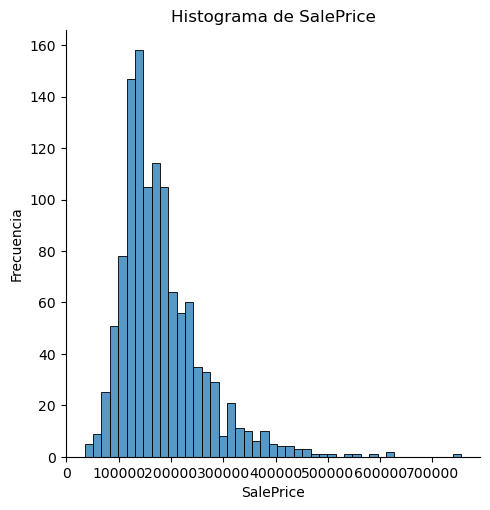

/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


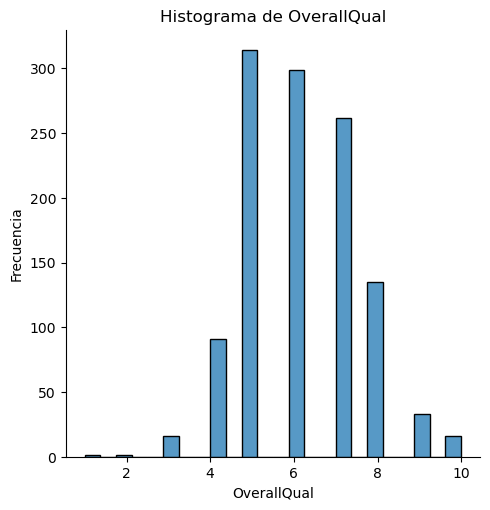

/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


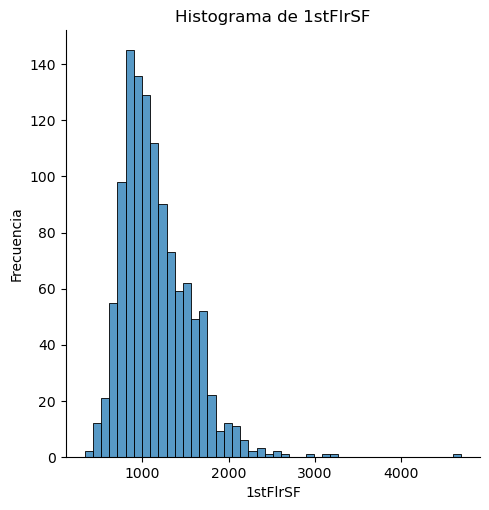

/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


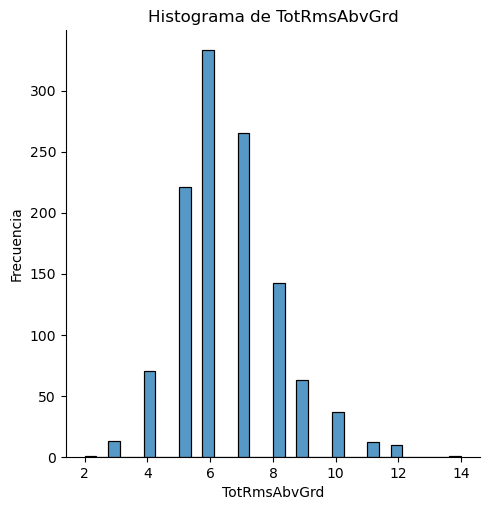

/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


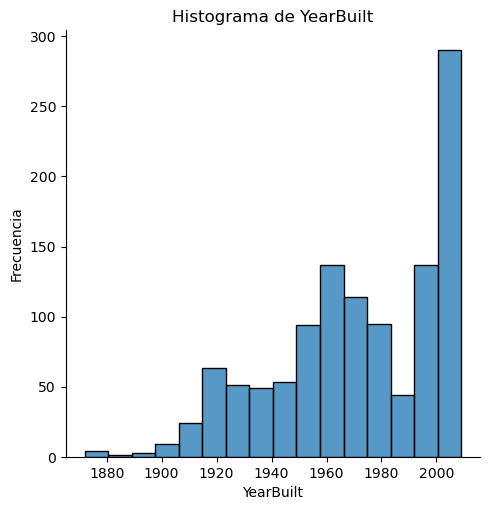

/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


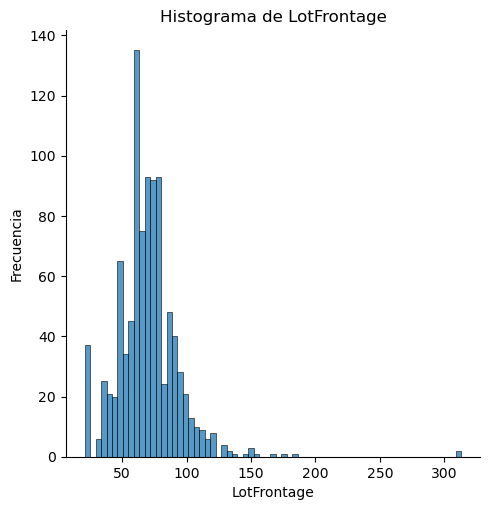

In [12]:
df_entrenamiento.columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']


for columna in df_entrenamiento.columns:
    sns.displot(df_entrenamiento[columna], kde=False)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()




In [19]:
correlacionOverallQual = df_entrenamiento['OverallQual'].corr(df_entrenamiento['SalePrice'])
print("Coeficiente de correlación entre x = 'OverallQual' e y = 'SalePrice:", correlacionOverallQual)

correlacion1stFlrSF = df_entrenamiento['1stFlrSF'].corr(df_entrenamiento['SalePrice'])
print("Coeficiente de correlación entre x = '1stFlrSF' e y = 'SalePrice:", correlacion1stFlrSF)

correlacionTotRmsAbvGrd = df_entrenamiento['TotRmsAbvGrd'].corr(df_entrenamiento['SalePrice'])
print("Coeficiente de correlación entre x = 'TotRmsAbvGrd' e y = 'SalePrice:", correlacionTotRmsAbvGrd)

correlacionYearBuilt = df_entrenamiento['YearBuilt'].corr(df_entrenamiento['SalePrice'])
print("Coeficiente de correlación entre x = 'YearBuilt' e y = 'SalePrice:", correlacionYearBuilt)

correlacionLotFrontage = df_entrenamiento['LotFrontage'].corr(df_entrenamiento['SalePrice'])
print("Coeficiente de correlación entre x = 'LotFrontage' e y = 'SalePrice:", correlacionLotFrontage)



Coeficiente de correlación entre x = 'OverallQual' e y = 'SalePrice: 0.7964358126132067
Coeficiente de correlación entre x = '1stFlrSF' e y = 'SalePrice: 0.5997063853756309
Coeficiente de correlación entre x = 'TotRmsAbvGrd' e y = 'SalePrice: 0.5354899307731878
Coeficiente de correlación entre x = 'YearBuilt' e y = 'SalePrice: 0.5352007606815784
Coeficiente de correlación entre x = 'LotFrontage' e y = 'SalePrice: 0.3490558480635717


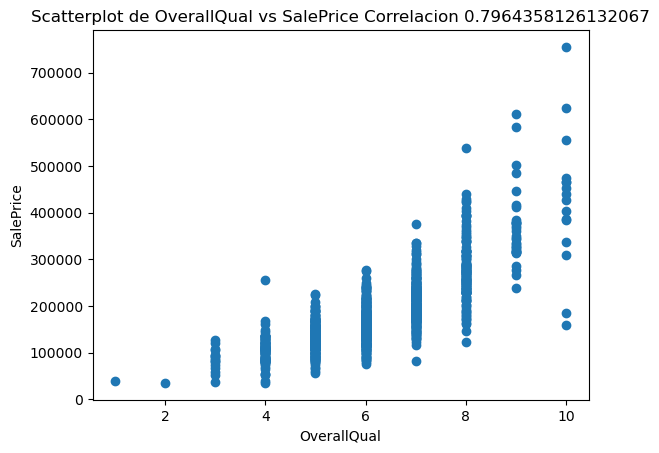

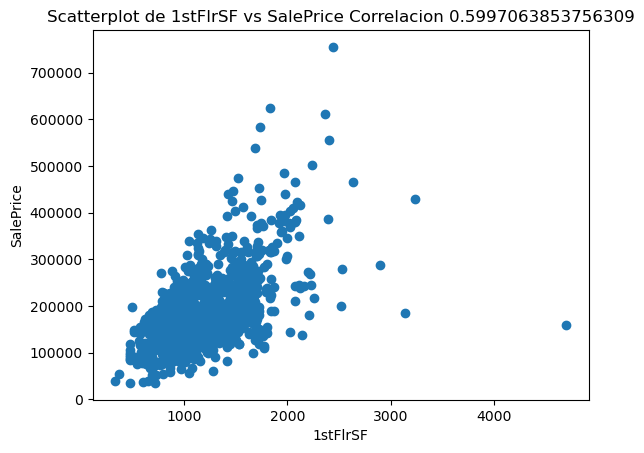

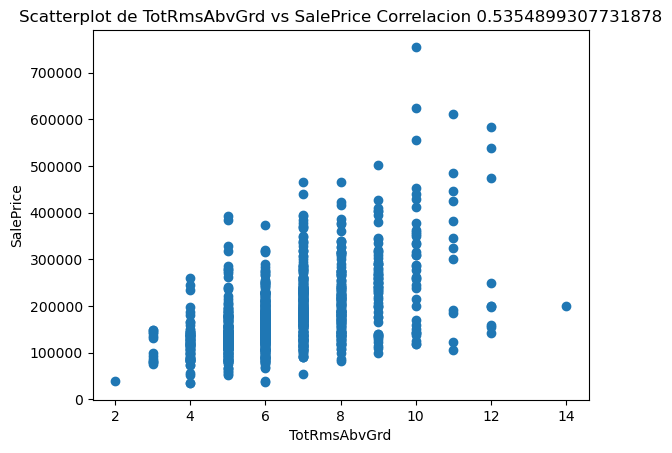

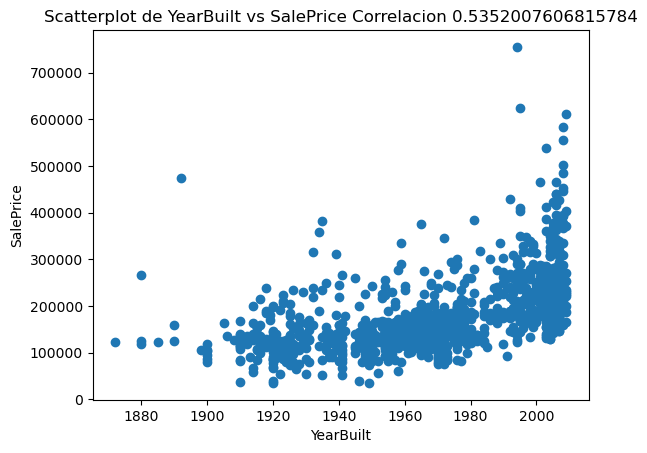

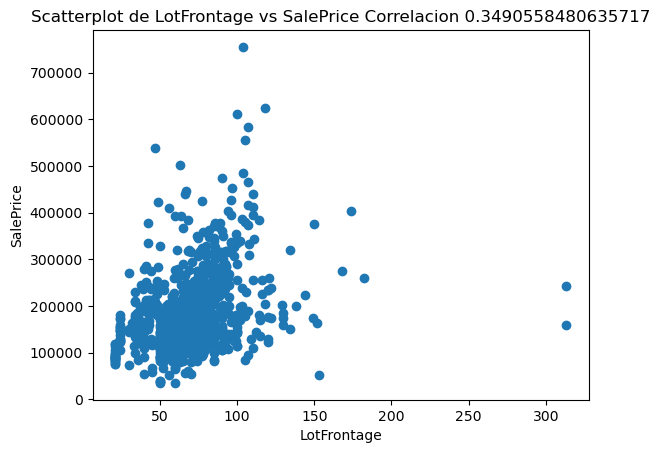

In [27]:
plt.scatter(df_entrenamiento['OverallQual'], df_entrenamiento['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title(f'Scatterplot de OverallQual vs SalePrice Correlacion {correlacionOverallQual}')
plt.show()

plt.scatter(df_entrenamiento['1stFlrSF'], df_entrenamiento['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title(f'Scatterplot de 1stFlrSF vs SalePrice Correlacion {correlacion1stFlrSF}')
plt.show()

plt.scatter(df_entrenamiento['TotRmsAbvGrd'], df_entrenamiento['SalePrice'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.title(f'Scatterplot de TotRmsAbvGrd vs SalePrice Correlacion {correlacionTotRmsAbvGrd}')
plt.show()

plt.scatter(df_entrenamiento['YearBuilt'], df_entrenamiento['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title(f'Scatterplot de YearBuilt vs SalePrice Correlacion {correlacionYearBuilt}')
plt.show()

plt.scatter(df_entrenamiento['LotFrontage'], df_entrenamiento['SalePrice'])
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title(f'Scatterplot de LotFrontage vs SalePrice Correlacion {correlacionLotFrontage}')
plt.show()
